# EDA Part 2

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd
import numpy as np

In [6]:
application_train=pd.read_csv("application_train.csv")

In [7]:
application_train.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df=application_train.sample(100000,random_state=42)

## Columns Description

In [9]:
HomeCredit_columns_description=pd.read_csv("HomeCredit_columns_description.csv",
                                           encoding="utf8", encoding_errors='ignore',low_memory=False)

In [10]:
HomeCredit_columns_description.head(3)

,Unnamed: 0,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN


# Other Files

In [11]:
bureau_balance=pd.read_csv("bureau_balance.csv")
bureau=pd.read_csv("bureau.csv")
credit_card_balance=pd.read_csv("credit_card_balance.csv")
installments_payments=pd.read_csv("installments_payments.csv")
POS_CASH_balance=pd.read_csv("POS_CASH_balance.csv")
previous_application=pd.read_csv("previous_application.csv")

## EDA 

In [28]:
import seaborn as sb
import matplotlib.pyplot as plt

In [29]:
eda_p2=["TARGET"]+list(df.columns)[60:]
df_p2=df[eda_p2]

In [30]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df_p2.select_dtypes(include=numerics)
num_col = num_df.columns
num_col[0:5]

Index(['TARGET', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE'],
      dtype='object')

In [31]:
def return_description():
    for i in range(len(num_col)):
        print(i,num_col[i])
        print(HomeCredit_columns_description[HomeCredit_columns_description["Row"]==num_col[i]]["Description"])

## Part 1, (27) under "normalized information about building where the..."

In [32]:
p1=num_col[1:28]

In [33]:
num_df[p1].isna().sum()[0:5]

YEARS_BEGINEXPLUATATION_MODE    48776
YEARS_BUILD_MODE                66514
COMMONAREA_MODE                 69912
ELEVATORS_MODE                  53316
ENTRANCES_MODE                  50302
dtype: int64

## Part 2, (4)  under "How many observation of client's social surrou..."

In [34]:
p2=num_col[28:32]

In [37]:
num_df[p2].head(3)

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
245895,0.0,0.0,0.0,0.0
98194,2.0,0.0,2.0,0.0
36463,5.0,0.0,5.0,0.0


In [39]:
num_df[p2].mean()

OBS_30_CNT_SOCIAL_CIRCLE    1.416174
DEF_30_CNT_SOCIAL_CIRCLE    0.143799
OBS_60_CNT_SOCIAL_CIRCLE    1.399195
DEF_60_CNT_SOCIAL_CIRCLE    0.100469
dtype: float64

In [40]:
num_df.groupby("TARGET")[p2].mean()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
TARGET,,,,
0,1.408999,0.139504,1.392077,0.097138
1,1.498375,0.193000,1.480750,0.138625


In [23]:
# similar in distribution

In [24]:
#df.groupby('TARGET')['OBS_30_CNT_SOCIAL_CIRCLE'].plot.hist(legend=True) -- same code as below

In [25]:
# 2/4 big percent diff - 4 distribution interesting
# 1/3 not much diff in distribution

(<AxesSubplot:>, <AxesSubplot:>)

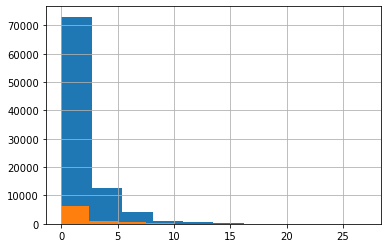

In [41]:
df[df["TARGET"]==0]["OBS_60_CNT_SOCIAL_CIRCLE"].hist(),df[df["TARGET"]==1]["OBS_60_CNT_SOCIAL_CIRCLE"].hist()

### Part 3, (1)  "DAYS_LAST_PHONE_CHANGE" -- pretty interesting/significant

In [42]:
p3=["DAYS_LAST_PHONE_CHANGE"]

In [43]:
#"How many days before application did client change phone"

In [45]:
num_df[p3].head(3)

,DAYS_LAST_PHONE_CHANGE
245895,-2.0
98194,-1071.0
36463,-1435.0


In [46]:
df.groupby("TARGET")[p3].mean()

,DAYS_LAST_PHONE_CHANGE
TARGET,
0,-978.963746
1,-802.909363


(<AxesSubplot:>, <AxesSubplot:>)

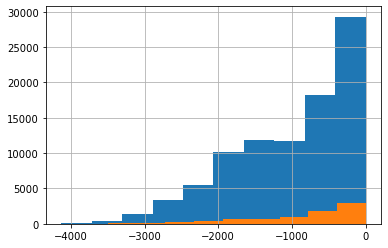

In [47]:
df[df["TARGET"]==0]["DAYS_LAST_PHONE_CHANGE"].hist(),df[df["TARGET"]==1]["DAYS_LAST_PHONE_CHANGE"].hist()

### Part 4, (20)  "Flag Doc"

In [48]:
# providing documents

In [49]:
p4=num_col[33:53]

In [51]:
num_df[p4].head(3)

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
245895,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98194,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36463,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [53]:
num_df[p4].sum()
# this is the num of ppl who submitted docs of each type,
# we will investigate pass the threshold of 1/100 per populaton 
#which is: #3,#5,#6,#8 (still gonna see for each tho)
# plus how mayn doc perperson

FLAG_DOCUMENT_2         7
FLAG_DOCUMENT_3     71040
FLAG_DOCUMENT_4         9
FLAG_DOCUMENT_5      1491
FLAG_DOCUMENT_6      8840
FLAG_DOCUMENT_7        20
FLAG_DOCUMENT_8      8174
FLAG_DOCUMENT_9       396
FLAG_DOCUMENT_10        3
FLAG_DOCUMENT_11      396
FLAG_DOCUMENT_12        1
FLAG_DOCUMENT_13      368
FLAG_DOCUMENT_14      300
FLAG_DOCUMENT_15      132
FLAG_DOCUMENT_16      954
FLAG_DOCUMENT_17       30
FLAG_DOCUMENT_18      823
FLAG_DOCUMENT_19       66
FLAG_DOCUMENT_20       60
FLAG_DOCUMENT_21       39
dtype: int64

(<AxesSubplot:>, <AxesSubplot:>)

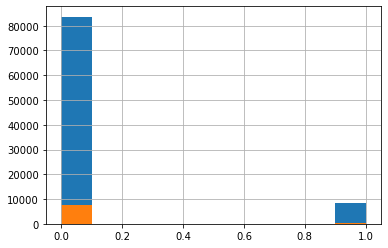

In [54]:
df[df["TARGET"]==0]["FLAG_DOCUMENT_6"].hist(),df[df["TARGET"]==1]["FLAG_DOCUMENT_6"].hist()

(array([9.09207523, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.90792477]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

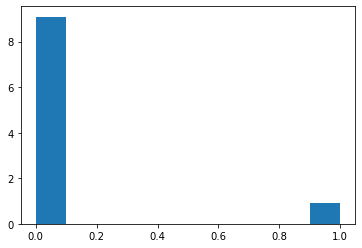

In [55]:
plt.hist(df[df["TARGET"]==0]["FLAG_DOCUMENT_6"],density=True)

(array([9.39076155, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.60923845]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

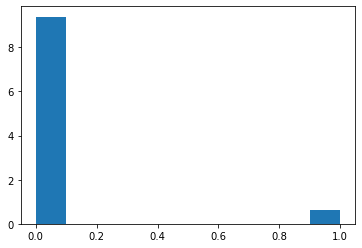

In [56]:
plt.hist(df[df["TARGET"]==1]["FLAG_DOCUMENT_6"],density=True)

In [57]:
# doc 2: not significant
# -- doc 3: little bit more 1 for class 0
# doc 4: not significant
# doc 5: pretty much the same distribution
# -- doc 6: little bit more 1 for class 0
# doc 7: not significant
# doc 8: pretty much the same distribution
# doc 9: not significant, pretty much the same distribution
# doc 10: not significant, pretty much the same distribution
# doc 11: not significant
# doc 12: not significant
# doc 13: not significant (tiny bit more 1 for class 0)
# doc 14: not significant
# doc 15: not significant
# doc 16: pretty much the same (close to threshold: 954)
# doc 17: not significant
# doc 18: not significant
# doc 19: not significant
# doc 20: not significant
# doc 21: not significant

### Part 5, (6)  "AMT_REQ_CREDIT_BUREAU_time"

In [58]:
p5=num_col[53:]

In [59]:
num_df[p5].head(3)

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
245895,0.0,0.0,0.0,1.0,0.0,1.0
98194,0.0,0.0,0.0,1.0,0.0,3.0
36463,0.0,0.0,0.0,1.0,0.0,3.0


In [60]:
num_df.groupby("TARGET")[p5].mean()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,,,,,,
0,0.006358,0.007723,0.034358,0.269166,0.264109,1.888091
1,0.007069,0.009325,0.035494,0.225147,0.267258,2.029779


(array([3.06949781e-01, 9.85110543e-02, 3.50018458e-02, 1.18951585e-02,
        2.05088940e-03, 0.00000000e+00, 6.83629801e-05, 0.00000000e+00,
        0.00000000e+00, 6.83629801e-05]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <BarContainer object of 10 artists>)

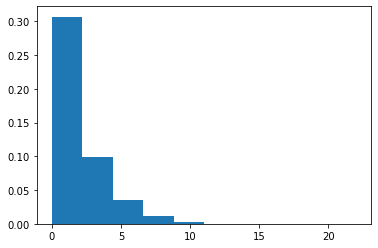

In [61]:
plt.hist(df[df["TARGET"]==1]["AMT_REQ_CREDIT_BUREAU_YEAR"],density=True)

(array([3.06949781e-01, 9.85110543e-02, 3.50018458e-02, 1.18951585e-02,
        2.05088940e-03, 0.00000000e+00, 6.83629801e-05, 0.00000000e+00,
        0.00000000e+00, 6.83629801e-05]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <BarContainer object of 10 artists>)

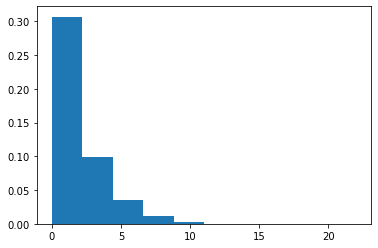

In [62]:
plt.hist(df[df["TARGET"]==1]["AMT_REQ_CREDIT_BUREAU_YEAR"],density=True)

In [63]:
# over all not much diff not very significant

### TEXT DATA (4)

In [65]:
text = df_p2.select_dtypes(exclude=numerics)
text_col=text.columns
text.head(3)


,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
245895,NaN,NaN,NaN,NaN
98194,reg oper account,block of flats,Monolithic,No
36463,NaN,NaN,NaN,NaN


In [67]:
text.isna().sum()

FONDKAPREMONT_MODE     68424
HOUSETYPE_MODE         50146
WALLSMATERIAL_MODE     50797
EMERGENCYSTATE_MODE    47350
dtype: int64

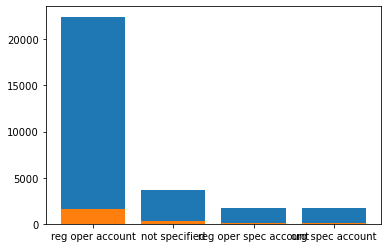

In [68]:
c0=plt.bar(['reg oper account', 'not specified', 'reg oper spec account',
       'org spec account'],height=df[df['TARGET']==0]['FONDKAPREMONT_MODE'].value_counts())
c1=plt.bar(['reg oper account', 'not specified', 'reg oper spec account',
       'org spec account'],height=df[df['TARGET']==1]['FONDKAPREMONT_MODE'].value_counts())
# pretty much the same

In [69]:
# second= not much diff
# -- third= significant distribution
# forth= not much diff

In [70]:
# plot for the second one:

<AxesSubplot:>

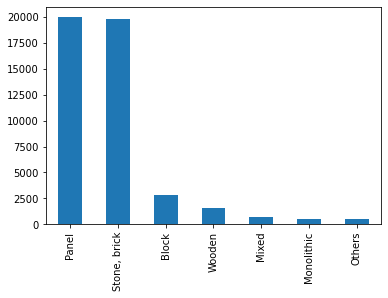

In [71]:
df[df["TARGET"]==0]["WALLSMATERIAL_MODE"].value_counts().plot(kind="bar")

<AxesSubplot:>

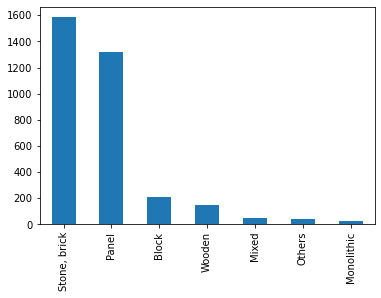

In [72]:
df[df["TARGET"]==1]["WALLSMATERIAL_MODE"].value_counts().plot(kind="bar")